# Import libraries:

In [64]:
import cv2
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import face_recognition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [155]:
from codes import importPath, resizeImages

# Converting all images into the same size:

60x60

# Age 0-2:

In [116]:
list_paths = importPath('0_2')

In [117]:
resizeImages(list_paths, '0-2', (60,60))

'All images were resized and saved into the new folder'

# Age 4-6:

In [118]:
list_paths = importPath('4_6')

In [119]:
resizeImages(list_paths, '4-6', (60,60))

'All images were resized and saved into the new folder'

# Age 8-12:

In [120]:
list_paths = importPath('8_12')

In [121]:
resizeImages(list_paths, '8-12', (60,60))

'All images were resized and saved into the new folder'

# Age 15-20:

In [122]:
list_paths = importPath('15_20')

In [123]:
resizeImages(list_paths, '15-20', (60,60))

'All images were resized and saved into the new folder'

# Age 25-32:

In [124]:
list_paths = importPath('25_32')

In [125]:
resizeImages(list_paths, '25-32', (60,60))

'All images were resized and saved into the new folder'

# Age 38-43:

In [126]:
list_paths = importPath('38_43')

In [127]:
resizeImages(list_paths, '38-43', (60,60))

'All images were resized and saved into the new folder'

# Age 48-53:

In [128]:
list_paths = importPath('48_53')

In [129]:
resizeImages(list_paths, '48-53', (60,60))

'All images were resized and saved into the new folder'

# Age 60-100:

In [130]:
list_paths = importPath('60_100')

In [131]:
resizeImages(list_paths, '60-100', (60,60))

'All images were resized and saved into the new folder'

# Getting all the images

In [156]:
def importNewPath(folder):
    path = f"../OUTPUT/treated_images/{folder}/*.jpg"
    print(path)
    faceFiles = glob.glob(path)
    return faceFiles 

In [157]:
folders = ['0-2', '4-6', '8-12', '15-20', '25-32', '38-43', '48-53', '60-100']

faceFiles = []
    
for files in folders:
    ff = importNewPath(files)
    faceFiles.append(ff)

../OUTPUT/treated_images/0-2/*.jpg
../OUTPUT/treated_images/4-6/*.jpg
../OUTPUT/treated_images/8-12/*.jpg
../OUTPUT/treated_images/15-20/*.jpg
../OUTPUT/treated_images/25-32/*.jpg
../OUTPUT/treated_images/38-43/*.jpg
../OUTPUT/treated_images/48-53/*.jpg
../OUTPUT/treated_images/60-100/*.jpg


In [158]:
pics = dict()
for ffiles in faceFiles:
    for foto in ffiles:
        label = foto.split("/")[-2]
        pic = foto
        if label in pics:
            pics[label].append(pic)
        else:
            pics[label] = [pic]

In [159]:
im = []

for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["label","foto"])

display(faces_df.head())

,label,foto
0,0-2,../OUTPUT/treated_images/0-2/image_669.jpg
1,0-2,../OUTPUT/treated_images/0-2/image_1570.jpg
2,0-2,../OUTPUT/treated_images/0-2/image_346.jpg
3,0-2,../OUTPUT/treated_images/0-2/image_441.jpg
4,0-2,../OUTPUT/treated_images/0-2/image_1055.jpg


In [160]:
faces_df.label.value_counts()

25-32     5023
0-2       2491
38-43     2340
4-6       2140
8-12      2124
15-20     1642
60-100     872
48-53      830
Name: label, dtype: int64

In [161]:
Age0_2 = pics['0-2']
Age0_2[0]

'../OUTPUT/treated_images/0-2/image_669.jpg'

# Create function to recognize faces in images:

In [162]:
%matplotlib inline

face_cascade = cv2.CascadeClassifier('../INPUT/haarcascade_frontalface_default.xml')


def extractFace(picFile, debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(im_bw, 2, 4)
    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    if debug:
        for (x,y,w,h) in faces:
            im = cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
            cara = im_bw[y:y+h, x:x+w]
            roi_color = im[y:y+h, x:x+w]
        plt.imshow(im)
    return cara

## Testing in one picture:

[[ 9  4 48 48]]


array([[  2,   1,   4, ...,   2,   1,   1],
       [ 19,  83,  84, ...,   0,   1,   1],
       [ 80,  74,  83, ...,   0,   5,   1],
       ...,
       [113, 104, 103, ...,  98, 105, 111],
       [100,  91, 111, ...,  91,  98, 100],
       [ 91, 105, 111, ...,  66,  87,  96]], dtype=uint8)

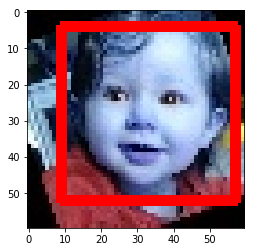

In [164]:
extractFace(Age0_2[8], debug=True)

## Apply in all images:

In [165]:
def printMyFace(facesImages, label):
    plt.figure(figsize=(20,5))
    for i,a in enumerate(facesImages):
        plt.subplot(1,len(facesImages), i + 1)
        plt.imshow(a, cmap="gray")
        plt.title(f"Face of {label}")

In [166]:
def processFiles(files, dim=(60,60)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile, debug=True)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim)
            output_faces.append(face)
    return output_faces

[[ 9  4 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  8 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  7 48 48]]
[[ 7  3 48 48]]
[[ 6  6 48 48]]
[[10  2 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 9  3 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 5  2 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[10  5 48 48]]
[[ 7  3 48 48]]
[[ 6  3 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 8  3 48 48]]
[[ 8  4 48 48]]
[[ 8  2 48 48]]


[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  3 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[11  4 48 48]]
[[ 9  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[11  4 48 48]]
[[ 8  5 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 9  3 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 8  3 48 48]]
[[ 4  3 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[11  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 9  3 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]


[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 5  6 48 48]]
[[ 3  5 48 48]]
[[ 5  3 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[11  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  9 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 3 11 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]


[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  3 48 48]]
[[ 2  4 48 48]]
[[ 4 10 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 2  4 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 2  8 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  1 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 9  2 48 48]]
[[11 10 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]


[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[18 17 24 24]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 4  2 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 9  3 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 9  3 48 48]]
[[ 7  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 4  9 48 48]]
[[ 9  5 48 48]]
[[ 4  3 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  3 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]


[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 1  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  7 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  3 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 9  3 48 48]]
[[ 9  2 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 1  2 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[ 4  3 48 48]]
[[ 7  2 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 9  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]


[[ 6  9 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 1  2 48 48]]
[[ 7  7 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 9  3 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[10  3 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 6  3 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 2  4 48 48]]


[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[10  4 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 3  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 9  8 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 2 10 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[10  2 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6 11 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]


[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 9  8 48 48]]
[[ 9  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 1  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[10  3 48 48]]
[[ 8  4 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 5  3 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 1  2 48 48]]


[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[10  7 48 48]]
[[ 6  1 48 48]]
[[ 5  2 48 48]]
[[ 5  3 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 8  1 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 9  9 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  3 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 3  3 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]


[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 5  3 48 48]]
[[ 3  4 48 48]]
[[ 9  6 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  1 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7 11 48 48]]
[[ 5  3 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 4  3 48 48]]
[[10  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[18 15 24 24]]
[[ 3  6 48 48]]


[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 5  6 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 6  2 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]


[[ 3  3 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  2 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 8  7 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 6  7 48 48]]
[[ 3  3 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 5 10 48 48]]
[[ 8  6 48 48]]
[[ 3  4 48 48]]
[[ 6  3 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 

[[ 7  4 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 8  7 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[18 16 24 24]]
[[ 6  5 48 48]]
[[17 16 24 24]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 8  2 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 4  3 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]


[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 4  4 48 48]]
[[ 5  3 48 48]]
[[ 8  6 48 48]]
[[ 6  8 48 48]]
[[ 6  2 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 9  3 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 9  7 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[10  4 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]


[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  8 48 48]]
[[ 4  3 48 48]]
[[ 7  4 48 48]]
[[ 7  9 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[10  4 48 48]]
[[ 4  5 48 48]]
[[18 17 24 24]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 9 10 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 5  2 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 3  6 48 48]]
[[ 7  3 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[10  3 48 48]]
[[ 8  5 48 48]]
[[ 1  3 48 48]]
[[18 17 24 24]]
[[ 6  7 48 48]]
[[ 8  8 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7 10 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]


[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  2 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[10  6 48 48]]
[[ 7  6 48 48]]
[[ 2  5 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]


[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  2 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  8 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 4  3 48 48]]
[[ 3  4 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  2 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]


[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 2  5 48 48]]
[[ 7 10 48 48]]
[[10  4 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 6  8 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 4  5 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 2  2 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[18 17 24 24]]
[[ 8  4 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 4  3 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[20 15 24 24]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]


[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 3  2 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 3  4 48 48]]
[[ 8  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 8  1 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[11  4 48 48]]
[[ 5  3 48 48]]
[[ 4  8 48 48]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[10  5 48 48]]
[[ 7  7 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 2  4 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]


[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 9  3 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 9  2 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 1  2 48 48]]
[[ 6  7 48 48]]
[[ 2  1 48 48]]


[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[19 18 24 24]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 4  7 48 48]]
[[ 3  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 6  3 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[18 17 

[[10  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 2  7 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  9 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 3  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 4  3 48 48]]
[[ 5  8 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  6 48 48]]


[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[11  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 5  4 48 48]]
[[ 8  9 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  2 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]


[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 4  3 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  3 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[18 15 24 24]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  4 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 

[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  3 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 4  3 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[10  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 3  5 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[10  5 48 48]]
[[ 4  3 48 48]]
[[ 6  6 

[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 2  5 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  8 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 5 10 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]


[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[10  4 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  7 48 48]]
[[ 8  4 48 48]]
[[ 4  8 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 4  4 48 48]]
[[ 4  9 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 7  5 

[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  2 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4 10 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 9  6 48 48]]
[[11  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  3 48 48]]
[[ 1  8 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[11  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 7  4 

[[ 7  6 48 48]]
[[10  2 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 9  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 1  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[10  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]


[[ 5  3 48 48]]
[[ 7  4 48 48]]
[[19 18 24 24]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[10  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 6  7 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[17 18 24 24]]
[[ 8  6 48 48]]
[[18 17 24 24]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 5  4 48 48]]
[[ 1  6 48 48]]
[[ 7  2 48 48]]
[[ 5  4 48 48]]
[[ 6  2 48 48]]
[[ 2  3 48 48]]
[[10  3 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 6  2 

[[ 6  3 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[10  6 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 6  2 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 9 11 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 0  5 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 9  4 48 48]]
[[ 5  6 48 48]]
[[ 4  3 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[18 16 24 24]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[17 17 24 24]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 8  8 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 2  1 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 1  2 48 48]]
[[ 3  7 48 48]]


[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  2 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[17 16 24 24]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 7  8 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 7  4 48 48]]
[[ 5  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  2 48 48]]
[[ 6  6 48 48]]
[[16 17 24 24]]
[[ 9  4 48 48]]


[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 7  8 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 4  9 48 48]]
[[ 9  3 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 2  5 48 48]]
[[18 17 24 24]]
[[ 2  6 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]


[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 3  3 48 48]]
[[10  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 5  7 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 8  2 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 2  2 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[11  5 48 48]]
[[ 4  6 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 3  2 48 48]]
[[ 7  6 48 48]]
[[18 17 24 24]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[10  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  2 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[20 15 24 24]]
[[ 8  6 48 48]]
[[ 2  7 48 48]]


[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 4  2 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5  2 48 48]]
[[ 3  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 8  4 48 48]]
[[10  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[18 17 24 24]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 4  4 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]


[[ 2  6 48 48]]
[[ 3  2 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 2  2 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[19 16 24 24]]


[[17 18 24 24]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 8  5 48 48]]
[[10  3 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[10  7 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 7 10 48 48]]
[[ 9  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[18 18 24 24]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 9  7 48 48]]
[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 3  6 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  3 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[20 18 24 24]]
[[ 7  3 48 48]]
[[ 4  8 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]


[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 6  8 48 48]]
[[ 5  9 48 48]]
[[ 4  8 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[18 16 24 24]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 

[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 1  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[18 17 24 24]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 7  3 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 

[[ 4  8 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 8  4 48 48]]
[[ 5  8 48 48]]
[[ 4  3 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[10  6 48 48]]
[[ 4  9 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[20 14 24 24]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 8  9 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[ 4  6 48 48]]
[[18 18 24 24]]
[[ 5  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[11  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]


[[ 7  6 48 48]]
[[ 5  7 48 48]]
[[ 7  9 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 8  7 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 9  3 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  0 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  3 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]


[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 9  4 48 48]]
[[ 9  5 48 48]]
[[ 5  8 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 9  8 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 3  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 4  7 48 48]]
[[ 6  7 48 48]]
[[ 2  1 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 4  6 48 48]]
[[ 6  8 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 7  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 6  7 48 48]]
[[10  2 48 48]]
[[ 6  2 48 48]]
[[ 4  5 48 48]]
[[11  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[10  9 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6 11 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]


[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 2  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 7  1 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[18 18 24 24]]
[[ 6  7 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  8 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 

[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 6  7 48 48]]
[[ 7  8 48 48]]
[[ 5  9 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 8  9 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[10  1 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 2  4 48 48]]
[[ 8  4 48 48]]
[[ 8  7 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 3  3 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]


[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  8 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 9  6 48 48]]
[[ 7  8 48 48]]
[[ 2  4 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 9  6 48 48]]
[[ 9  3 48 48]]
[[ 8  7 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[11  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 3  8 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6 10 48 48]]
[[ 7  8 48 48]]


[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 1  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  8 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  3 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 4  3 48 48]]
[[ 6  7 48 48]]
[[ 1  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 8  7 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[20 18 24 24]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[17 16 24 24]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 3  5 

[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[10  6 48 48]]
[[ 7  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 4  1 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[19 18 24 24]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  7 48 48]]
[[10  5 48 48]]
[[ 8  6 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]


[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[16 15 24 24]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  9 48 48]]
[[ 8  4 48 48]]
[[ 4  7 48 48]]
[[18 17 24 24]]
[[ 9  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 8  2 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 7  7 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]


[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 2  5 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]
[[ 5  7 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 4  7 48 48]]
[[ 6  6 48 48]]
[[ 7  8 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 9  3 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  2 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  2 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  8 48 48]]
[[10  3 48 48]]
[[ 6  5 48 48]]


[[ 7  7 48 48]]
[[ 1  2 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 9  5 48 48]]
[[ 8  7 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 2  7 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 2  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 8  8 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[10  5 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 9  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]


[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 7  7 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  3 48 48]]
[[ 8  7 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  8 48 48]]
[[ 6  1 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  0 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 4  1 48 48]]
[[ 6  8 48 48]]


[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  2 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 3  6 48 48]]
[[ 8  6 48 48]]
[[ 3  6 48 48]]
[[ 5  6 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 7  9 48 48]]
[[ 9  1 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[10  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]


[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 1  4 48 48]]
[[ 5  5 48 48]]
[[ 2  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[10  7 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 1  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[10  7 48 48]]
[[ 5  7 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]


[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 4  8 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  3 48 48]]
[[ 8  9 48 48]]
[[ 9  7 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 6 10 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 4  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 2  8 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]


[[ 6  4 48 48]]
[[ 4  7 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 6  8 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5 10 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]


[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 7  3 48 48]]
[[ 9  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[18 15 24 24]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[18 17 24 24]]
[[ 6  6 48 48]]
[[ 7  1 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 3  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[11  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]


[[ 5  7 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 4  4 48 48]]
[[10 10 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 6  8 48 48]]
[[ 5  6 48 48]]
[[ 6  1 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 3  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[17 17 24 24]]
[[ 7  8 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]


[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[17 18 24 24]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  8 48 48]]
[[ 7  5 48 48]]
[[ 7  0 48 48]]
[[ 8  6 48 48]]
[[ 3  6 48 48]]
[[ 8  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[18 18 24 24]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  8 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]


[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 3  6 48 48]]
[[ 7  5 48 48]]
[[ 1  6 48 48]]
[[18 16 24 24]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 1  2 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[16 17 24 24]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 4  3 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 

[[ 6  5 48 48]]
[[ 3  3 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  2 48 48]]
[[ 7  6 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 3  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  9 48 48]]
[[ 4  5 48 48]]
[[ 4  7 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]


[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 9  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 8  6 48 48]]
[[ 9  7 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 3  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 6  6 48 48]]
[[ 1  6 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[18 16 24 24]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]


[[19 16 24 24]]
[[ 4  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 3 10 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 3  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[18 16 24 24]]
[[ 4  7 48 48]]
[[ 8  5 48 48]]
[[ 7  3 48 48]]
[[ 4  6 48 48]]
[[ 8  4 48 48]]
[[ 9  8 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]


[[ 9  5 48 48]]
[[11  8 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  7 48 48]]
[[ 5  8 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[10  7 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 8  7 48 48]]
[[ 5  6 48 48]]
[[ 4  7 48 48]]
[[ 9  8 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 1  6 48 48]]
[[ 8  5 48 48]]
[[ 6  9 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[10  3 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 2  5 48 48]]
[[ 8  9 48 48]]
[[ 3  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[18 16 24 24]]


[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 4  7 48 48]]
[[ 6  4 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  8 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 4  7 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 7  5 48 48]]
[[ 2  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  9 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[10 10 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]


[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[20 18 24 24]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 1  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[10  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]


[[ 8  5 48 48]]
[[18 16 24 24]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  7 48 48]]
[[ 3  3 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 3  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[10 10 48 48]]
[[ 6  4 48 48]]
[[ 9  7 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]


[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 2  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 9  5 48 48]]
[[ 9  4 48 48]]
[[ 8  6 48 48]]
[[ 3  5 48 48]]
[[ 7  8 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 3  4 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 4  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 6  8 48 48]]
[[ 5  4 48 48]]
[[ 8  9 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 8 11 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]


[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 8  6 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 2  3 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 4  6 48 48]]
[[ 5  8 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 4  4 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 6  8 48 48]]


[[ 7  6 48 48]]
[[11  7 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  9 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 2  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 5  9 48 48]]
[[ 4  5 48 48]]
[[ 3  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 3  3 48 48]]
[[ 6  6 48 48]]
[[ 6  9 48 48]]


[[ 8  6 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 3  7 48 48]]
[[ 8  9 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  7 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 7  7 48 48]]
[[ 8  7 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 2  5 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 8 11 48 48]]
[[20 18 24 24]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 5  7 48 48]]
[[ 6  8 48 48]]
[[ 6  4 48 48]]
[[ 3  7 48 48]]


[[ 7  4 48 48]]
[[ 3  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  8 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 3  5 48 48]]
[[ 7 11 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[10  3 48 48]]
[[18 15 24 24]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[17 16 24 24]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  3 48 48]]
[[ 5  8 48 48]]
[[ 6  8 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]


[[ 3  4 48 48]]
[[ 7  2 48 48]]
[[ 8  5 48 48]]
[[ 4  8 48 48]]
[[ 4  8 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 3  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 3  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 3  6 48 48]]
[[10  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 

[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  8 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 3  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[10  2 48 48]]
[[ 6  1 48 48]]
[[10  4 48 48]]
[[ 8  5 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  7 48 48]]
[[ 8  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 6  7 48 48]]


[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  9 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  8 48 48]]
[[ 6  5 48 48]]
[[ 2  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  8 48 48]]
[[ 6  3 48 48]]
[[ 5  8 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  9 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]


[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 7  1 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 3  7 48 48]]
[[ 6  2 48 48]]
[[ 4  6 48 48]]
[[ 7  3 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]


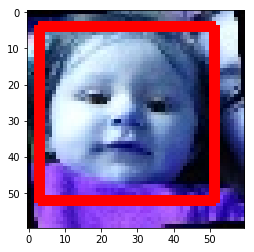

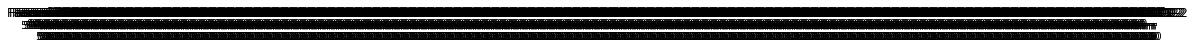

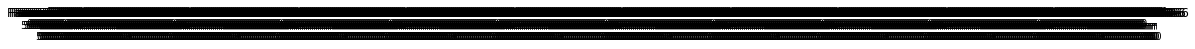

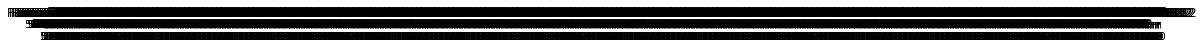

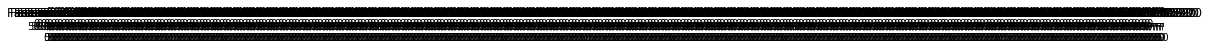

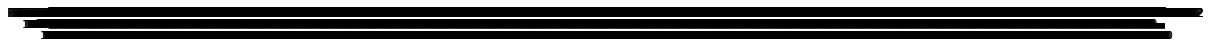

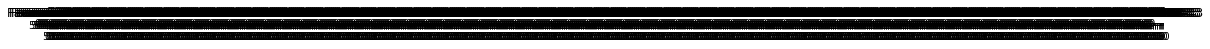

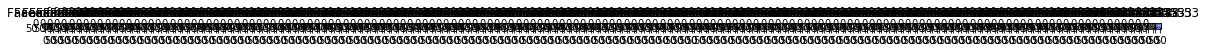

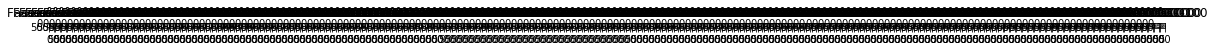

In [167]:
for label,fotos in pics.items():
    faces = processFiles(fotos)
    printMyFace(faces,label=label)

In [ ]:
dhjwhljhklhkweqkdejkwjlkj

In [194]:
pics.keys()

dict_keys(['0-2', '4-6', '8-12', '15-20', '25-32', '38-43', '48-53', '60-100'])

In [197]:
len(pics['0-2'])

2491

In [199]:
f0 = pics['0-2']

list

[[12 11 24 24]]
[[13 12 24 24]]


[[12 11 24 24]]
[[12 12 24 24]]


[[12 11 24 24]]
[[12 10 24 24]]
[[12 10 24 24]]


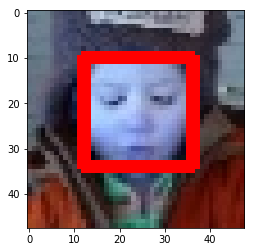

In [201]:
result = processFiles(f0, dim=(60,60))

In [203]:
data = {'Age': '0_2',
       'result': result}

result_df = pd.DataFrame.from_dict(data)

In [205]:
result_df.shape

(7, 2)

In [ ]:
sqjeisj2piejp2jeip2j

# Extracting Features

In [168]:
def extractFeatures(faceIm, useFeats="face",debug=False):
    if debug:
        plt.figure()
        plt.imshow(faceIm, cmap="gray")
    if useFeats == "fft":
        fft2d = np.log(np.abs(np.fft.fft2(faceIm)))
        fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]
        fft2d = fft2d[5:20,5:20]
        
        if debug:
            plt.figure()
            plt.imshow(fft2d, cmap="gray")
            print(fft2d.shape)
        return np.hstack(fft2d)
    elif useFeats == "face":
        imcol = cv2.cvtColor(faceIm, cv2.COLOR_GRAY2RGB)
        feats = face_recognition.face_encodings(imcol)
        if len(feats) > 0:
            return feats[0]
        return None

[[ 9  4 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  8 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  7 48 48]]
[[ 7  3 48 48]]
[[ 6  6 48 48]]
[[10  2 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 9  3 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 5  2 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[10  5 48 48]]
[[ 7  3 48 48]]
[[ 6  3 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 8  3 48 48]]
[[ 8  4 48 48]]
[[ 8  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  3 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[11  4 48 48]]
[[ 9  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[11  4 48 48]]
[[ 8  5 48 48]]
[[ 5  7 48 48]]
[[ 6  6 

[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 9  3 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 8  3 48 48]]
[[ 4  3 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[11  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 9  3 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 5  6 48 48]]
[[ 3  5 48 48]]
[[ 5  3 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]


[[11  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  9 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 3 11 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  3 48 48]]
[[ 2  4 48 48]]
[[ 4 10 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 2  4 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 2  8 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  1 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]


[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 9  2 48 48]]
[[11 10 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[18 17 24 24]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 4  2 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 9  3 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 9  3 48 48]]
[[ 7  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 4  9 48 48]]
[[ 9  5 48 48]]
[[ 4  3 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  3 48 48]]


[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 1  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  7 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  3 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 9  3 48 48]]
[[ 9  2 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 1  2 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[ 4  3 48 48]]
[[ 7  2 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 9  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  9 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 6  6 

[[ 7  7 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 9  3 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[10  3 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 6  3 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 2  4 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[10  4 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 3  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 8  5 

[[ 9  8 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 2 10 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[10  2 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6 11 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 9  8 48 48]]
[[ 9  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 1  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]


[[ 7  6 48 48]]
[[10  3 48 48]]
[[ 8  4 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 5  3 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 1  2 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[10  7 48 48]]
[[ 6  1 48 48]]
[[ 5  2 48 48]]
[[ 5  3 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 8  1 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]


[[ 9  9 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  3 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 3  3 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 5  3 48 48]]
[[ 3  4 48 48]]
Processing 0-2....
[[ 9  6 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  1 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  3 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7 11 48 48]]
[[ 5  3 48 48]]
[[ 4  5 48 48]]
[[ 8 

[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 6  2 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 3  3 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  2 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  3 48 48]]


[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 8  7 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 6  7 48 48]]
[[ 3  3 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 5 10 48 48]]
[[ 8  6 48 48]]
[[ 3  4 48 48]]
[[ 6  3 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 8  7 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[18 16 24 24]]
[[ 6  5 48 48]]
[[17 16 24 24]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 

[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 4  3 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 4  4 48 48]]
[[ 5  3 48 48]]
[[ 8  6 48 48]]
[[ 6  8 48 48]]
[[ 6  2 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 9  3 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 9  7 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 

[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[10  4 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  8 48 48]]
[[ 4  3 48 48]]
[[ 7  4 48 48]]
[[ 7  9 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[10  4 48 48]]
[[ 4  5 48 48]]
[[18 17 24 24]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 9 10 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 5  2 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 3  6 48 48]]
[[ 7  3 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[10  3 48 48]]
[[ 8  5 48 48]]
[[ 1  3 48 48]]
[[18 17 24 24]]
[[ 6  7 48 48]]
[[ 8  8 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]


[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7 10 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  2 48 48]]
[[ 8  3 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[10  6 48 48]]
[[ 7  6 48 48]]
[[ 2  5 

[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  2 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  8 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 4  3 48 48]]
[[ 3  4 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  2 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 2  5 48 48]]
[[ 7 10 48 48]]
[[10  4 48 48]]
[[ 8  5 48 48]]
[[ 5  4 

[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 6  8 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 4  5 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 2  2 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[18 17 24 24]]
[[ 8  4 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 4  3 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[20 15 24 24]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 3  2 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 3  4 48 48]]
[[ 8  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 

[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[11  4 48 48]]
[[ 5  3 48 48]]
[[ 4  8 48 48]]
[[ 6  4 48 48]]
[[ 7  3 48 48]]
[[10  5 48 48]]
[[ 7  7 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 2  4 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
Processing 4-6....
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 2  4 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 4 

[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 3  5 48 48]]
[[ 4  7 48 48]]
[[ 3  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 6  3 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[18 17 24 24]]
[[10  5 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 2  7 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 

[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  9 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 3  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 4  3 48 48]]
[[ 5  8 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]


[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[11  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 5  4 48 48]]
[[ 8  9 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  2 48 48]]
[[ 6  5 48 48]]


[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 4  3 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  3 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[18 15 24 24]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]


[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  4 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  3 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 4  3 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[10  6 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 

[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[10  5 48 48]]
[[ 4  3 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  8 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]


[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 2  5 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 4  3 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 5  8 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 5 10 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 7  3 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[10  4 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  3 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 

[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 4  4 48 48]]
[[ 4  9 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  2 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4 10 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 

[[ 1  8 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]
[[11  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[10  2 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 4  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 9  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 1  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 

[[10  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 5  3 48 48]]
[[ 7  4 48 48]]
[[19 18 24 24]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[10  4 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
Processing 8-12....


[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 6  7 48 48]]
[[ 4  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[17 18 24 24]]
[[ 8  6 48 48]]
[[18 17 24 24]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 5  4 48 48]]
[[ 1  6 48 48]]
[[ 7  2 48 48]]
[[ 5  4 48 48]]
[[ 6  2 48 48]]
[[ 2  3 48 48]]
[[10  3 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 6  3 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  6 48 48]]
[[ 6  2 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[17 16 24 24]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  8 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 4  5 48 48]]
[[ 5  4 48 48]]
[[10  6 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 6  2 48 48]]
[[ 6  4 48 48]]
[[ 5  3 

[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 0  5 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 9  4 48 48]]
[[ 5  6 48 48]]
[[ 4  3 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[18 16 24 24]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[17 17 24 24]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 8  8 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 2  1 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 1  2 48 48]]
[[ 3  7 48 48]]
[[ 4  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 4  2 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[17 16 24 24]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 4  5 48 48]]


[[ 9  4 48 48]]
[[ 7  8 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 7  4 48 48]]
[[ 5  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  2 48 48]]
[[ 6  6 48 48]]
[[16 17 24 24]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 7  8 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 4  9 48 48]]
[[ 9  3 48 48]]
[[ 8  5 48 48]]


[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 2  5 48 48]]
[[18 17 24 24]]
[[ 2  6 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 3  3 48 48]]
[[10  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 5  7 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 8  2 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 2  2 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[11  5 48 48]]
[[ 4  6 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 3  2 48 48]]
[[ 7  6 48 48]]
[[18 17 24 24]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[10  6 48 48]]
[[ 7  5 48 48]]


[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  2 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[20 15 24 24]]
[[ 8  6 48 48]]
[[ 2  7 48 48]]
[[ 7  3 48 48]]
[[ 5  4 48 48]]
[[ 4  2 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[18 17 24 24]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5  2 48 48]]
[[ 3  2 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 8  4 48 48]]
[[10  5 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[18 17 24 24]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 5  4 48 48]]
[[ 4  4 48 48]]


[[ 4  4 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 2  6 48 48]]
[[ 3  2 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 2  2 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[19 16 24 24]]
Processing 15-20....


[[17 18 24 24]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 8  5 48 48]]
[[10  3 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[10  7 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 7 10 48 48]]
[[ 9  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[18 18 24 24]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 9  7 48 48]]
[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 3  6 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 7  3 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  3 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[20 18 24 24]]
[[ 7  3 48 48]]
[[ 4  8 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 5  7 

[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 6  8 48 48]]
[[ 5  9 48 48]]
[[ 4  8 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[18 16 24 24]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 7  8 48 48]]
[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 1  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 

[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]
[[ 7  3 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 4  8 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 8  4 48 48]]
[[ 5  8 48 48]]
[[ 4  3 48 48]]
[[ 9  6 48 48]]
[[ 5  5 

[[ 8  5 48 48]]
[[20 14 24 24]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 8  9 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 9  5 48 48]]
[[ 4  6 48 48]]
[[18 18 24 24]]
[[ 5  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[11  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  7 48 48]]
[[ 7  9 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 8  7 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  3 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 9  3 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  0 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 

[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  3 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 9  4 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 9  4 48 48]]
[[ 9  5 48 48]]
[[ 5  8 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 9  8 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 3  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 4  7 48 48]]
[[ 6  7 48 48]]
[[ 2  1 48 48]]
[[ 9  6 48 48]]
[[ 8  5 48 48]]
[[ 4  6 48 48]]
[[ 6  8 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 7  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 6  7 48 48]]
[[10  2 48 48]]
[[ 6  2 48 48]]
[[ 4  5 48 48]]
[[11  4 48 48]]


[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[10  9 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6 11 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 2  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 5  3 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  7 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 7  1 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[18 18 24 24]]
[[ 6  7 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 

[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  8 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 4  3 48 48]]
[[ 6  7 48 48]]
[[ 7  8 48 48]]
[[ 5  9 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 8  9 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[10  1 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 2  4 48 48]]
[[ 8  4 

[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 3  3 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 4  4 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 7  8 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 9  6 48 48]]
[[ 7  8 48 48]]
[[ 2  4 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 9  6 48 48]]
[[ 9  3 48 48]]
[[ 8  7 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[11  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 9  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 3  8 48 48]]
[[ 4  6 48 48]]


[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6 10 48 48]]
[[ 7  8 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[ 9  5 48 48]]
[[ 6  4 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 1  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  8 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  3 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 5  4 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 8  6 48 48]]
[[ 4  3 48 48]]
[[ 6  7 48 48]]
[[ 1  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 8  7 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[20 18 

[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[10  6 48 48]]
[[ 7  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 4  1 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[19 18 24 24]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  7 48 48]]
[[10  5 48 48]]
[[ 8  6 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]


[[ 7  5 48 48]]
[[ 5  7 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[16 15 24 24]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 9  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 8  8 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  9 48 48]]
[[ 8  4 48 48]]
[[ 4  7 48 48]]
[[18 17 24 24]]
[[ 9  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 8  2 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 7  7 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]


[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 8  4 48 48]]
[[ 2  5 48 48]]
[[ 6  6 48 48]]
[[ 7  3 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]
[[ 5  7 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 4  7 48 48]]
[[ 6  6 48 48]]
[[ 7  8 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 9  3 48 48]]
[[ 4  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  2 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  2 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  8 48 48]]
[[10  3 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 1  2 48 48]]
[[ 7  5 48 48]]
[[ 8  3 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 9  5 48 48]]
[[ 8  7 48 48]]
[[ 6  6 48 48]]
[[ 3  4 48 48]]
[[ 7  7 48 48]]


[[ 6  6 48 48]]
[[ 9  5 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 2  7 48 48]]
[[ 6  7 48 48]]
[[ 7  6 48 48]]
[[ 2  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 8  8 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[10  5 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 9  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 9  4 48 48]]
[[ 7  7 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  3 48 48]]
[[ 8  7 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  4 

[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  8 48 48]]
[[ 6  1 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  0 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 4  1 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 9  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  2 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]


[[ 4  5 48 48]]
[[ 3  6 48 48]]
[[ 8  6 48 48]]
[[ 3  6 48 48]]
[[ 5  6 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]
[[ 7  9 48 48]]
[[ 9  1 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[10  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 1  4 48 48]]
[[ 5  5 48 48]]
[[ 2  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  2 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[10  7 48 48]]
[[ 6  6 

[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 1  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[10  7 48 48]]
[[ 5  7 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 4  8 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 5  3 48 48]]
[[ 8  9 48 48]]
[[ 9  7 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 6 10 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 4  6 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  6 48 48]]


[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 8  8 48 48]]
[[ 2  8 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 4  7 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 6  8 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5 10 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 4  4 48 48]]
[[ 7  6 48 48]]


[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 7  3 48 48]]
[[ 9  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[18 15 24 24]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[18 17 24 24]]
[[ 6  6 48 48]]
[[ 7  1 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 3  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 3  5 48 48]]
[[ 6  4 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 

[[11  6 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 9  5 48 48]]
[[ 5  7 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 4  4 48 48]]
[[10 10 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 9  4 48 48]]
[[ 6  8 48 48]]
[[ 5  6 48 48]]
[[ 6  1 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 3  5 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 3  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  8 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[17 17 24 24]]
[[ 7  8 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  6 

[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 7  8 48 48]]
[[ 7  5 48 48]]
[[ 7  0 48 48]]
[[ 8  6 48 48]]
[[ 3  6 48 48]]
[[ 8  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 4  7 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[18 18 24 24]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  6 48 48]]
[[ 6  8 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]


[[ 7  6 48 48]]
[[ 5  6 48 48]]
Processing 25-32....
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 3  6 48 48]]
[[ 7  5 48 48]]
[[ 1  6 48 48]]
[[18 16 24 24]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 1  2 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[16 17 24 24]]
[[ 7  5 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 4  4 48 48]]
[[ 4  3 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 6  7 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  8 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 

[[ 6  5 48 48]]
[[ 9  2 48 48]]
[[ 7  6 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 3  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  3 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 8  4 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 7  6 48 48]]
[[ 9  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  9 48 48]]
[[ 4  5 48 48]]
[[ 4  7 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 9  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 9  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]


[[ 8  6 48 48]]
[[ 9  7 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  4 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 7  5 48 48]]
[[ 3  3 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 3  4 48 48]]
[[ 7  5 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 2  4 48 48]]
[[ 6  6 48 48]]
[[ 1  6 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[18 16 24 24]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 9  6 48 48]]
[[19 16 24 24]]
[[ 4  6 48 48]]
[[ 8  5 48 48]]
[[ 5  5 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 7  8 48 48]]
[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 3 10 48 48]]


[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 4  4 48 48]]
[[ 5  4 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 4  6 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 3  5 48 48]]
[[ 8  4 48 48]]
[[ 5  5 48 48]]
[[18 16 24 24]]
[[ 4  7 48 48]]
[[ 8  5 48 48]]
[[ 7  3 48 48]]
[[ 4  6 48 48]]
[[ 8  4 48 48]]
[[ 9  8 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 8  3 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 9  5 48 48]]
[[11  8 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  7 48 48]]
[[ 5  8 48 48]]
[[ 8  4 48 48]]
[[ 6  4 48 48]]
[[10  7 48 48]]
[[ 7  6 48 48]]
[[ 9  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 8  7 48 48]]
[[ 5  6 48 48]]
[[ 4  7 48 48]]
[[ 9  8 48 48]]
[[ 8  4 48 48]]
[[ 4  5 48 48]]
[[ 1  6 48 48]]
[[ 8  5 48 48]]
[[ 6  9 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[10  3 

[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 2  5 48 48]]
[[ 8  9 48 48]]
[[ 3  6 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 9  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[18 16 24 24]]
[[ 9  5 48 48]]
[[ 5  5 48 48]]
[[ 6  4 48 48]]
[[ 4  7 48 48]]
[[ 6  4 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  8 48 48]]
[[ 5  4 48 48]]
[[ 8  5 48 48]]
[[ 6  8 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 4  7 48 48]]
[[ 4  5 48 48]]
[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 7  5 48 48]]
[[ 2  6 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  9 48 48]]


[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  4 48 48]]
[[ 5  7 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 4  6 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[10 10 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  7 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  3 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[20 18 24 24]]
[[ 8  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 7  7 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  7 48 48]]


[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 4  5 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 1  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[10  4 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 5  4 48 48]]
[[ 6  4 48 48]]
[[ 8  5 48 48]]
[[18 16 24 24]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 8  3 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[ 5  4 48 48]]
[[ 8  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 5  7 48 48]]
[[ 3  3 48 48]]
[[ 5  5 48 48]]
[[ 7  3 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 3  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  4 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[10 10 48 48]]
[[ 6  4 48 48]]
[[ 9  7 48 48]]
[[ 6  6 48 48]]


[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 6  6 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 4  4 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 4  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 2  3 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 9  5 48 48]]
[[ 9  4 48 48]]
[[ 8  6 48 48]]
[[ 3  5 48 48]]
[[ 7  8 48 48]]
[[ 5  4 48 48]]
[[ 8  3 48 48]]
[[ 3  4 48 48]]
[[ 5  5 48 48]]
[[ 9  6 48 48]]
[[ 5  5 48 48]]
[[ 8  6 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 4  4 48 48]]
[[ 4  6 48 48]]
[[ 7  4 48 48]]
[[ 8  5 48 48]]
[[ 8  5 48 48]]
[[ 7  6 48 48]]
[[ 5  6 48 48]]
[[ 4  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 7  7 48 48]]
[[ 6  8 48 48]]
[[ 5  4 48 48]]
[[ 8  9 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 8 11 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  8 48 48]]
[[ 6  5 48 48]]


[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 8  3 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 8  4 48 48]]
[[ 5  6 48 48]]
[[ 6  6 48 48]]
[[ 9  4 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 8  6 48 48]]
[[ 5  7 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 8  6 48 48]]
[[ 2  3 48 48]]
[[ 7  6 48 48]]
[[ 6  7 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 4  6 48 48]]
[[ 5  8 48 48]]
[[ 6  6 48 48]]
[[ 7  5 48 48]]
[[ 4  4 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 5  4 48 48]]
[[ 7  3 48 48]]
[[ 4  4 48 48]]
[[ 4  5 48 48]]
[[ 5  7 48 48]]


[[ 6  8 48 48]]
Processing 38-43....
[[ 7  6 48 48]]
[[11  7 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 9  4 48 48]]
[[ 6  4 48 48]]
[[ 7  4 48 48]]
[[ 8  3 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 7  7 48 48]]
[[ 6  9 48 48]]
[[ 9  5 48 48]]
[[ 7  6 48 48]]
[[ 4  6 48 48]]
[[ 2  5 48 48]]
[[ 7  4 48 48]]
[[ 6  4 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 4  6 48 48]]
[[ 7  6 48 48]]
[[ 5  9 48 48]]
[[ 4  5 48 48]]
[[ 3  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 3  3 48 48]]
[[ 6  6 48 48]]
[[ 6  9 48 48]]
[[ 8  6 48 48]]
[[ 6  4 48 48]]
[[ 3  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 9  4 48 48]]


[[ 6  5 48 48]]
[[ 3  7 48 48]]
[[ 8  9 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 4  7 48 48]]
[[ 7  7 48 48]]
[[ 6  7 48 48]]
[[ 6  6 48 48]]
[[ 6  7 48 48]]
[[ 9  6 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 7  4 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 7  7 48 48]]
[[ 8  7 48 48]]
[[ 4  5 48 48]]
[[ 7  6 48 48]]
[[ 5  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 2  5 48 48]]
[[ 7  5 48 48]]
[[ 6  8 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 8 11 48 48]]
[[20 18 24 24]]
[[ 7  6 48 48]]
[[ 6  3 48 48]]
[[ 5  7 48 48]]
[[ 6  8 48 48]]
[[ 6  4 48 48]]
[[ 3  7 48 48]]
[[ 7  4 48 48]]
[[ 3  5 48 48]]
[[ 6  5 48 48]]
[[ 5  4 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 8  6 48 48]]
[[ 4  5 48 48]]
[[ 6  5 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  8 48 48]]
[[ 8  6 48 48]]


[[ 7  4 48 48]]
[[ 7  6 48 48]]
[[ 8  5 48 48]]
[[ 3  5 48 48]]
[[ 7 11 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 4  5 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  7 48 48]]
[[10  3 48 48]]
[[18 15 24 24]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[17 16 24 24]]
[[ 6  5 48 48]]
[[ 5  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 7  7 48 48]]
[[ 6  3 48 48]]
[[ 5  8 48 48]]
[[ 6  8 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 8  3 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 3  4 48 48]]
[[ 7  2 48 48]]
[[ 8  5 48 48]]
[[ 4  8 48 48]]
[[ 4  8 48 48]]
[[ 7  6 48 48]]
[[ 6  5 48 48]]
[[ 8  4 48 48]]
[[ 6  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 9  5 48 48]]
Processing 48-53....


[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  6 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 6  6 48 48]]
[[ 7  4 48 48]]
[[ 8  7 48 48]]
[[ 5  4 48 48]]
[[ 6  5 48 48]]
[[ 3  6 48 48]]
[[ 4  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 7  4 48 48]]
[[ 5  4 48 48]]
[[ 5  6 48 48]]
[[ 8  4 48 48]]
[[ 3  6 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 8  5 48 48]]
[[ 9  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 3  6 48 48]]
[[10  4 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 5  5 48 48]]
[[ 5  5 48 48]]
[[ 5  6 48 48]]
[[ 5  7 48 48]]
[[ 7  6 48 48]]
[[ 7  6 48 48]]
[[ 7  4 48 48]]
[[ 6  5 48 48]]
[[ 4  8 48 48]]
[[ 5  4 48 48]]


[[ 8  6 48 48]]
[[ 6  5 48 48]]
[[ 3  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 8  5 48 48]]
[[ 6  5 48 48]]
[[ 6  3 48 48]]
[[ 6  5 48 48]]
[[ 6  5 48 48]]
[[ 4  5 48 48]]
[[ 8  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 3  6 48 48]]
[[ 6  4 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[10  2 48 48]]
[[ 6  1 48 48]]
[[10  4 48 48]]
[[ 8  5 48 48]]
[[ 7  2 48 48]]
[[ 6  4 48 48]]
[[ 6  7 48 48]]
[[ 7  4 48 48]]
[[ 6  6 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 7  5 48 48]]
[[ 4  5 48 48]]
[[ 6  4 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 8  7 48 48]]
[[ 8  6 48 48]]
[[ 4  4 48 48]]
[[ 6  5 48 48]]
[[ 5  6 48 48]]
[[ 8  6 48 48]]
[[ 6  7 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 5  6 48 48]]
[[ 7  6 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 5  5 48 48]]
[[ 6  5 48 48]]
[[ 4  4 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 6  9 48 48]]
[[ 7  4 48 48]]
[[ 6  7 48 48]]


[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 6  5 48 48]]
[[ 5  8 48 48]]
[[ 6  5 48 48]]
[[ 2  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 8  8 48 48]]
[[ 6  3 48 48]]
[[ 5  8 48 48]]
[[ 7  5 48 48]]
[[ 5  5 48 48]]
[[ 7  5 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 4  7 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 6  4 48 48]]
[[ 8  6 48 48]]
[[ 7  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
[[ 7  5 48 48]]
[[ 5  4 48 48]]
[[ 7  6 48 48]]
[[ 7  5 48 48]]
[[ 6  5 48 48]]
[[ 6  7 48 48]]
[[ 5  6 48 48]]
[[ 4  6 48 48]]
[[ 6  5 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 6  9 48 48]]
[[ 8  7 48 48]]
[[ 6  4 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  7 48 48]]
[[ 6  6 48 48]]
[[ 6  6 48 48]]
[[ 8  5 48 48]]
[[ 7  7 48 48]]
[[ 5  7 48 48]]
[[ 8  5 48 48]]
[[ 6  4 48 48]]
[[ 6  4 48 48]]
[[ 7  7 48 48]]
[[ 7  5 48 48]]
[[ 8  4 48 48]]
[[ 6  5 48 48]]
[[ 7  6 48 48]]
[[ 8  4 48 48]]
[[ 7  5 48 48]]
[[ 7  1 48 48]]


[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 7  5 48 48]]
[[ 3  7 48 48]]
[[ 6  2 48 48]]
[[ 4  6 48 48]]
[[ 7  3 48 48]]
[[ 4  5 48 48]]
[[ 5  6 48 48]]
[[ 6  5 48 48]]
Processing 60-100....


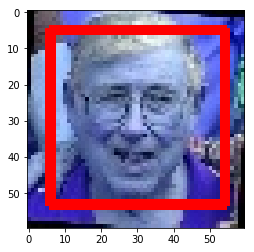

In [169]:
featurized_dataset = []

for label,fotos in pics.items():
    faces = processFiles(fotos)
    print(f"Processing {label}....")
    for i,face in enumerate(faces):
        featurized_dataset.append({
            "label":label,
            "picName":i,
            "feats":extractFeatures(face)
        })

# Results in dataframe:

In [170]:
df = pd.DataFrame(featurized_dataset)
df.head()

,label,picName,feats
0,0-2,0,"[-0.08381818234920502, 0.029888320714235306, 0..."
1,0-2,1,"[-0.1659928262233734, 0.028850678354501724, 0...."
2,0-2,2,"[-0.05834181234240532, -0.012763982638716698, ..."
3,0-2,3,None
4,0-2,4,"[-0.08665087074041367, -0.02353181317448616, 0..."


In [171]:
df.label.value_counts()

25-32     1286
8-12       664
4-6        553
38-43      527
0-2        497
15-20      339
60-100     186
48-53      155
Name: label, dtype: int64

In [172]:
df = df[~df.feats.isna()]

In [173]:
df.feats.isna().value_counts()

False    4089
Name: feats, dtype: int64

# Train model:

In [174]:
X = np.vstack(df.feats)
y = df.label

In [175]:
print(X.shape,y.shape)

(4089, 128) (4089,)


In [176]:
le = preprocessing.LabelEncoder()
le.fit(y)


y_numeric = le.transform(y)
y_numeric

array([0, 0, 0, ..., 6, 6, 6])

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2)

In [178]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
model.predict(X_test)

array([2, 4, 2, 2, 3, 2, 1, 2, 2, 2, 2, 7, 2, 4, 2, 2, 0, 2, 7, 2, 7, 7,
       7, 7, 6, 2, 2, 7, 2, 2, 2, 7, 2, 2, 4, 2, 4, 3, 2, 2, 4, 6, 6, 0,
       7, 7, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 7, 0, 7, 7, 2, 2, 3, 4,
       7, 3, 0, 2, 7, 2, 2, 4, 1, 3, 2, 2, 4, 4, 4, 2, 2, 4, 4, 3, 0, 6,
       7, 0, 2, 4, 2, 0, 2, 6, 7, 2, 2, 1, 7, 2, 0, 0, 2, 3, 3, 7, 3, 2,
       7, 0, 2, 2, 2, 3, 2, 2, 2, 7, 3, 2, 0, 4, 2, 2, 2, 4, 7, 7, 4, 2,
       3, 7, 2, 2, 4, 0, 2, 2, 0, 4, 2, 2, 7, 0, 3, 2, 2, 6, 7, 2, 2, 0,
       2, 2, 7, 7, 7, 2, 2, 3, 2, 2, 2, 2, 7, 2, 2, 2, 2, 4, 7, 2, 7, 4,
       2, 2, 2, 3, 4, 0, 0, 4, 0, 4, 2, 0, 7, 0, 2, 4, 2, 0, 0, 0, 7, 2,
       4, 7, 7, 3, 3, 3, 7, 0, 2, 2, 1, 0, 3, 2, 7, 0, 7, 2, 2, 2, 2, 7,
       2, 2, 3, 2, 0, 4, 0, 7, 2, 4, 2, 2, 4, 7, 2, 7, 2, 4, 3, 3, 2, 4,
       3, 2, 2, 1, 7, 2, 1, 4, 2, 0, 2, 2, 4, 7, 7, 2, 2, 2, 0, 2, 7, 2,
       4, 0, 4, 2, 4, 7, 3, 7, 2, 2, 4, 2, 2, 0, 7, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 7, 2, 2, 1, 7, 3, 2,

In [180]:
y_pred = model.predict(X_test)

In [181]:
pd.DataFrame({
    "pred": le.inverse_transform(y_pred),
    "real": le.inverse_transform(y_test)
})

,pred,real
0,25-32,25-32
1,4-6,4-6
2,25-32,38-43
3,25-32,25-32
4,38-43,38-43
...,...,...
813,8-12,8-12
814,25-32,60-100
815,25-32,38-43
816,60-100,60-100


# Check results - Confusion Matrix:

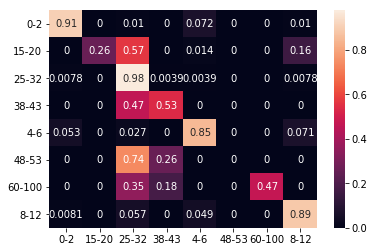

In [182]:
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), normalize="true")
sns.heatmap(cm, annot=True,xticklabels=le.classes_, yticklabels=le.classes_)

## Comments:

- 0_2: Accuracy of 91%
- 4_6: Accuracy of 85%
- 8_12: Accuracy of 89%
    
These are good results!

- 15_20: Only 26% accyrate. Is mostly wrongly recognize as 25_32.
- 25_32: 98% Accuracy, however, images that are not 25_32 are being classified as if they were. 
- 38_43: 50% is predicting corrected, but the other half is wrongly classifying as 25_32.
- 48_53: All predictions are wrong. 74% as 25_32 and 26% as 38_43.
- 60_100: Only 47% is getting right. 35% is wr0ngly predicting as 25_32 and 18% as 38_43.

These results are bad!!! This model fail to predict the age on images.

## Conclusion:

- Almost all the results are saying that is 25_32. Could be because they have more images than the rest. So, let's reduce the quantity of images by half.
- The model is not ideal, let's use a NN and check results. 